In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# 无删除数据的merge

In [109]:
bank_train = pd.read_csv('bank_train.csv',index_col=0)
bill_train=pd.read_csv('bill_train.csv' ,index_col=0)   #账单记录表
browse_train_onehot=pd.read_csv('browse_train_onehot.csv',index_col=0) #浏览信息表onehot
browse_train=pd.read_csv('browse_train.csv',index_col=0) #浏览信息表
loan_train=pd.read_csv('df_loan_train.csv',index_col=0) #放款时间表
overdue_train=pd.read_csv('df_overdue_train.csv' ,index_col=0) #逾期记录表
user_train=pd.read_csv('user_train.csv',index_col=0)  #用户信息表
user_train_onehot=pd.read_csv('user_train_onehot.csv',index_col=0)  #用户信息表onehot

In [110]:
train=pd.merge(user_train,bank_train,how='inner',on='user_id')

In [111]:
train=pd.merge(train,bill_train,how='inner',on='user_id')

In [112]:
train=pd.merge(train,browse_train,how='inner',on='user_id')
train=pd.merge(train,loan_train,how='inner',on='user_id')
train=pd.merge(train,overdue_train,how='inner',on='user_id')

In [113]:
train.shape

(5298, 153)

In [116]:
train.head()

,user_id,sex,job,education,marriage,residence,earningnum,earningsum,expendnum,expendsum,...,brows_beh before lending_sum,brows_beh before lending_max,brows_beh before lending_mean,brows_beh before lending_min,brows_beh before lending_std,brows_beh before lending_var,brows_num before lending_count,brows_num before lending_count（unique）,time,overdue
0,1265,1,3,4,3,1,124.0,1695.142678,290.0,3610.695042,...,42080.0,213.0,100.190476,23.0,57.814302,3342.493465,420.0,6.0,5915892687,0
1,2583,2,2,2,1,1,213.0,2736.475318,618.0,7064.310678,...,79749.0,213.0,113.602564,31.0,61.438952,3774.744815,702.0,7.0,5917275087,0
2,29165,1,2,4,1,4,189.0,2277.607807,473.0,5099.861165,...,44946.0,190.0,110.977778,38.0,50.094534,2509.462376,405.0,5.0,5928679887,0
3,2443,1,4,4,3,1,252.0,3020.288782,341.0,3762.790364,...,76571.0,214.0,114.114754,7.0,61.582007,3792.343528,671.0,8.0,5917015887,0
4,590,1,2,4,1,1,281.0,3684.672002,842.0,8621.443967,...,6714.0,190.0,111.900000,38.0,53.406246,2852.227119,60.0,5.0,5915374287,1


In [117]:
train=train.drop(['loantime'],axis=1)
train_onehot=train_onehot.drop(['loantime'],axis=1)

In [118]:
train=train.drop(['time'],axis=1)
train_onehot=train_onehot.drop(['time'],axis=1)

In [119]:
train.shape

(5298, 151)

In [120]:
train.to_csv('train.csv')
train_onehot.to_csv('train_onehot.csv')

# 特征提取

In [2]:
train_scaled = pd.read_csv('train_scaled.csv',index_col=0)

In [3]:
train_scaled.head()

,user_id,sex_0,sex_1,job_0,job_1,job_2,job_3,education_0,education_1,education_2,...,brows_num before lending_3,brows_num before lending_4,brows_num before lending_5,brows_num before lending_6,brows_num before lending_7,brows_num before lending_8,brows_num before lending_9,brows_num before lending_10,brows_num before lending_11,overdue
0,1265,0,1,0,0,0,1,0,0,0,...,-0.256697,-0.245729,0.006296,-0.293652,-0.270100,-0.375523,-0.105924,0.207819,-0.040746,0
1,2583,0,0,0,0,1,0,0,0,1,...,-0.256697,0.107256,0.227392,-0.098178,-0.128606,0.049666,-0.105924,-0.000830,-0.040746,0
2,29165,0,1,0,0,1,0,0,0,0,...,-0.256697,-0.171416,-0.435897,-0.215463,-0.128606,-0.375523,-0.105924,-0.126019,-0.040746,0
3,2443,0,1,0,0,0,0,0,0,0,...,1.047291,-0.208573,0.374790,0.175487,-0.118499,-0.029073,-0.105924,-0.320757,-0.040746,0
4,590,0,1,0,0,1,0,0,0,0,...,-0.256697,-0.542980,-0.435897,-0.606412,-0.613727,-0.375523,-0.105924,-0.543315,-0.040746,1


In [5]:
#先使用Filter法的方差分析筛选。
x = train_scaled.drop(['user_id','overdue'],axis=1)
x = np.array(x)
y = train_scaled[['overdue']]
y = np.array(y)

from sklearn.feature_selection import SelectKBest, f_classif
#f_classif（方差分析的F值）：评估特征的指标。一般的，f_regression用作回归; chi2卡方检验，f_classif等用作分类
#k：选择的特征的个数
selector = SelectKBest(f_classif, k=40)             #用f_classif方法，设定数目为40
a=selector.fit(x,y)
#print(a.scores_,'\n',a.get_support())    #输出得分及选择的结果

d:\python3.6\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python3.6\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [58 82] are constant.
  UserWarning)
d:\python3.6\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [7]:
keys = list(train_scaled.iloc[:,1:-1])
values = a.scores_
scores = dict(zip(keys,values))
del scores['repay_status_min']
del scores['repay_status_median']

In [8]:
sorted(scores.items(),key=lambda item:item[1])

[('repay_status_max', 0.026614729904219567),
 ('brows_num before lending_2', 0.04209232125105853),
 ('education_3', 0.07223196450313094),
 ('avail_bal_var', 0.10010156359936151),
 ('credit_amount_mean - cur_bill_bal_mean', 0.11437433783177314),
 ('brows_beh before lending_std', 0.1401559118270781),
 ('marriage_1', 0.2173957905997985),
 ('cur_bill_bal_var', 0.22971221336804315),
 ('avail_bal_mean', 0.23140555670291088),
 ('cyclic_accr_median', 0.24536752224009964),
 ('adjust_amount_median', 0.2596928608856597),
 ('repay_status_sum', 0.2681233009492672),
 ('brows_num before lending_3', 0.2844995703291182),
 ('credit_amount_median - cur_bill_bal_median', 0.3174096595506505),
 ('cur_bill_minrepay_var', 0.38820000548159633),
 ('job_3', 0.4418528077036814),
 ('avail_bal_min', 0.48471964105736143),
 ('cons_num_var', 0.4941527488485786),
 ('last_repay_amount_sum - last_bill_amount_sum', 0.533421093755196),
 ('brows_beh before lending_max', 0.5629523646835114),
 ('repay_status_std', 0.664018896

In [9]:
df_scores=pd.DataFrame(scores,index=[0])

In [10]:
df_scores=pd.DataFrame.stack(df_scores, level=-1, dropna=True)

In [162]:
df_scores.to_csv('filter_scores.csv')

In [11]:
# wrapper
from sklearn.tree import DecisionTreeClassifier    #导入基模型
from sklearn.feature_selection import RFE          #导入RFE模块
model1 = DecisionTreeClassifier()                  #建立一个决策树分类模型
rfe = RFE(model1,15)                                #进行多轮训练，设置筛选特征数目为15个
rfe = rfe.fit(x,y)                                 #模型的拟合训练
print(rfe.support_)                                #输出特征的选择结果
print(rfe.ranking_)                                #特征的选择排名

d:\python3.6\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False  True False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False False False False  True
 False False False  True False False False False  True False  True False
 False False False False False  True False  True False  True False False
 False False False False False False False False]
[ 25 114 113 110  69 107  80 105 104  72 121 112 128 122  95 117  59  78
 

In [164]:
keys2 = list(train_scaled.iloc[:,1:-1])
values2 = rfe.ranking_
scores2 = dict(zip(keys2,values2))
#del scores['repay_status_min']
#del scores['repay_status_median']

In [165]:
sorted(scores2.items(),key=lambda item:item[1])

[('earning_avg', 1),
 ('last_repay_amount_sum', 1),
 ('cur_bill_bal_sum', 1),
 ('cur_bill_bal_median', 1),
 ('last_repay_amount_std', 1),
 ('last_bill_amount_var', 1),
 ('last_repay_amount_sum - last_bill_amount_sum', 1),
 ('last_repay_amount_max - last_bill_amount_max', 1),
 ('credit_amount_max - cur_bill_bal_max', 1),
 ('cur_bill_minrepay_max + cyclic_accr_max', 1),
 ('last_repay_amount_median - last_bill_amount_median', 1),
 ('cur_bill_minrepay_std + cyclic_accr_std', 1),
 ('brows_beh before lending_mean', 1),
 ('brows_beh before lending_std', 1),
 ('brows_num before lending_1', 1),
 ('last_bill_amount_mean', 2),
 ('credit_amount_median - cur_bill_bal_median', 3),
 ('brows_num before lending_6', 4),
 ('credit_amount_sum - cur_bill_bal_sum', 5),
 ('cur_bill_bal_max', 6),
 ('credit_amount_min - cur_bill_bal_min', 7),
 ('cur_bill_amount_mean', 8),
 ('credit_amount_std', 9),
 ('cons_num_max', 10),
 ('brows_num before lending_7', 11),
 ('last_repay_amount_var - last_bill_amount_var', 12)

In [166]:
df_scores2=pd.DataFrame(scores2,index=[0])

In [167]:
df_scores2=pd.DataFrame.stack(df_scores2, level=-1, dropna=True)

In [169]:
df_scores2.to_csv('df_scores2.csv')

# xgboost

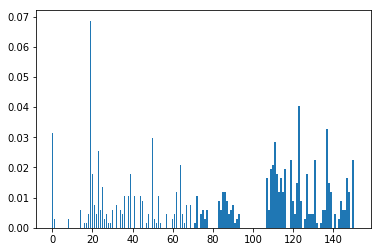

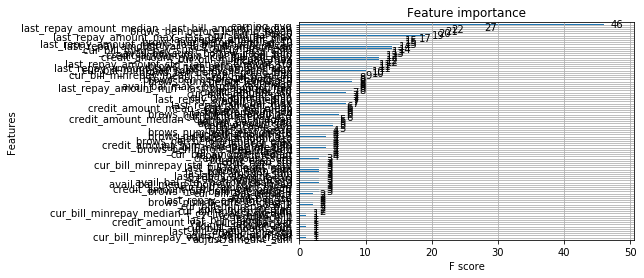

In [5]:
#coding=utf-8
# plot feature importance manually
#XGBOOST
import pandas as pd
from matplotlib import pyplot
from xgboost import plot_importance
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.tree import DecisionTreeClassifier    #导入基模型

#load data
tr_x = pd.read_csv("train_scaled.csv",index_col=0)
tr_y = pd.read_csv("train_scaled.csv",index_col=0)
#tr_xy=pd.merge(tr_x,tr_y)
x=tr_x.drop(['user_id','overdue'],axis=1)#axis=1删除列。
y=tr_y.overdue
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=8)
#（1）固定随机种子（random_state），可以让每次划分训练集和验证集的时候都是完全一样的。
#切分数据，固定随机种子（random_state）时，同样的代码，得到的训练集数据相同。
model=XGBClassifier()
model.fit(X_train,y_train)
#模型训练

pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

plot_importance(model)
pyplot.show()
feature_imp = pd.DataFrame(model.feature_importances_, index=X_test.columns, columns=["importance"])
feat_imp_200 = feature_imp.sort_values("importance", ascending=False).index
#data = tr_x.ix[:, feat_imp_200]
#data.to_csv("tr_xy_gp.csv",index=True)
#feature_imp.to_csv("XGBOOST_imp.csv",index=True)

In [2]:
#GBDT
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


#load data
tr_x = pd.read_csv("train_scaled.csv",index_col=0)
tr_y = pd.read_csv("train_scaled.csv",index_col=0)
#tr_xy=pd.merge(tr_x,tr_y)
X=tr_x.drop(['user_id','overdue'],axis=1)#axis=1删除列。
Y=tr_y.overdue
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X,Y)
y_pred = gbm0.predict(X)
y_predprob = gbm0.predict_proba(X)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(Y.values, y_pred))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(Y, y_predprob))
score = gbm0.feature_importances_
print(gbm0.feature_importances_.shape)
feature_imp1 = pd.DataFrame(gbm0.feature_importances_, index=X.columns, columns=["importance"])

Accuracy : 0.8805
AUC Score (Train): 0.883277
(152,)


In [176]:
T_imp=model.feature_importances_+gbm0.feature_importances_#重要性求和
featureimp=pd.DataFrame(T_imp,index=X.columns,columns=["importance"])
featureimp= featureimp.sort_values("importance", ascending=False)
featureimp.to_csv("T_imp.csv",index=True)#生成特征重要性表
featureimp_152= featureimp.sort_values("importance", ascending=False).head(152).index

data = tr_x.ix[:, featureimp_152]
data.to_csv("F_train.csv",index=True)#生成提取特征后的训练数据

d:\python3.6\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [12]:
#导入三种排序过的分数表
filter_scores= pd.read_csv("filter_scores.csv")
T_imp = pd.read_csv("T_imp.csv")
wrapper_scores= pd.read_csv("df_scores2.csv")

In [6]:
# filter_select 
list=[]
train_select=pd.read_csv("train_scaled.csv",index_col=0)
for n in range(len(filter_scores)):
    filter_select=filter_scores.iloc[:n+1,0]
    dataSet1=np.array(filter_select)#datafram转numpy.array
    filter_select=dataSet1.tolist()#numpy.array转list

    x_test=train_select[filter_select]
    # filter
    x_test1 = np.array(x_test)                             #建立自变量的二维数组
    y_test1 = train_select[['overdue']]
    y_test1 = np.array(y_test1)                             #建立因变量的二维数组
    m1 = DecisionTreeClassifier()                           #建立决策树分类模型
    m1.fit(x_test1,y_test1)                                 #模型的拟合训练
    scores = cross_val_score(m1, x_test1, y_test1, cv=5, scoring= 'f1')       #将数据集分为5份，分别进行5次回归，返回得分
    list.append(np.mean(scores))
    

d:\python3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
# wrapper_select   
list_wrapper=[]
for n in range(len(wrapper_scores)):
    wrapper_select=filter_scores.iloc[:n,0]
    dataSet2=np.array(wrapper_select)#datafram转numpy.array
    wrapper_select=dataSet2.tolist()#numpy.array转list
len(wrapper_select)

128

In [14]:
wrapper_select

['sex_0',
 'earning_avg',
 'cur_bill_bal_max',
 'last_bill_amount_max',
 'borrow_cash_max',
 'last_repay_amount_max',
 'cur_bill_minrepay_max',
 'last_repay_amount_median',
 'last_repay_amount_mean',
 'credit_amount_max',
 'last_repay_amount_sum',
 'last_bill_amount_sum',
 'repay_status_count',
 'cur_bill_bal_sum',
 'cur_bill_minrepay_sum',
 'cur_bill_amount_max',
 'credit_amount_sum',
 'borrow_cash_sum',
 'avail_bal_sum - borrow_cash_sum',
 'cur_bill_amount_sum',
 'cur_bill_minrepay_sum + cyclic_accr_sum',
 'borrow_cash_std',
 'cur_bill_amount_std',
 'last_bill_amount_min',
 'cur_bill_minrepay_max + cyclic_accr_max',
 'cur_bill_bal_median',
 'cur_bill_amount_min',
 'borrow_cash_var',
 'income_avg',
 'credit_amount_std',
 'avail_bal_std - borrow_cash_std',
 'last_bill_amount_mean',
 'cur_bill_minrepay_min + cyclic_accr_min',
 'un_income_avg',
 'cur_bill_minrepay_min',
 'last_bill_amount_median',
 'cur_bill_minrepay_median',
 'avail_bal_var - borrow_cash_var',
 'cons_num_min',
 'credit_

In [73]:
train_select1=train_select[wrapper_select]
train_128=train_select1.join(train_select.iloc[:,-1])

In [75]:
train_128.to_csv('train_128.csv')

In [ ]:
 #wrapper
    x_test2 = train_select[wrapper_select]
    x_test2 = np.array(x_test2)                             #建立自变量的二维数组
    y_test2 = train_select[['overdue']]
    y_test2 = np.array(y_test2)                             #建立因变量的二维数组
    m2 = DecisionTreeClassifier()                           #建立决策树分类模型
    m2.fit(x_test2,y_test2)                                 #模型的拟合训练
    scores = cross_val_score(m2, x_test2, y_test2, cv=5, scoring= 'f1')       #将数据集分为5份，分别进行5次回归，返回得分
    list_wrapper.append(np.mean(scores))

In [9]:
# xgboost_select   
list_xgboost=[]
for n in range(len(T_imp)):
    xgboost_select=filter_scores.iloc[:n+1,0]
    dataSet3=np.array(xgboost_select)#datafram转numpy.array
    xgboost_select=dataSet3.tolist()#numpy.array转list

    #xgboost
    x_test3 = train_select[xgboost_select]
    x_test3 = np.array(x_test3)                             #建立自变量的二维数组
    y_test3 = train_select[['overdue']]
    y_test3 = np.array(y_test3)                             #建立因变量的二维数组
    m3 = DecisionTreeClassifier()                           #建立决策树分类模型
    m3.fit(x_test3,y_test3)                                 #模型的拟合训练
    scores = cross_val_score(m3, x_test3, y_test3, cv=5, scoring= 'f1')       #将数据集分为5份，分别进行5次回归，返回得分
    list_xgboost.append(np.mean(scores))

d:\python3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
df_scores1.head()

,list_xgboost
0,0.094466
1,0.200631
2,0.204327
3,0.210320
4,0.205763


In [29]:
df_scores2.head()

,wrapper,list_xgboost
0,0.094466,0.094466
1,0.200631,0.200631
2,0.200120,0.204327
3,0.205809,0.210320
4,0.212291,0.205763


In [46]:
scores2 ={'wrapper':list_wrapper,'xgboost':list_xgboost}#合并成一个新的字典c
df_scores2= pd.DataFrame(scores2)

In [47]:
scores1={'filter':list}
df_scores1=pd.DataFrame(scores1)

In [48]:
score=df_scores1.join(df_scores2,how='outer')

In [49]:
score.to_csv('score.csv')

In [55]:
score=pd.read_csv('score.csv',index_col=0)

In [56]:
score.head()

,filter,wrapper,xgboost,mean
0,0.094466,0.094466,0.094466,0.094466
1,0.200631,0.200631,0.200631,0.200631
2,0.193735,0.200120,0.204327,0.199394
3,0.209710,0.205809,0.210320,0.208613
4,0.212747,0.212291,0.205763,0.210267


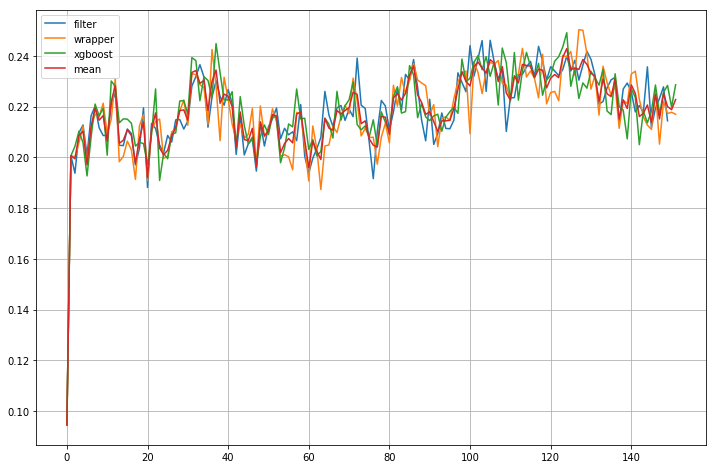

In [87]:
score.plot(figsize=(12,8),grid=True)